<a href="https://colab.research.google.com/github/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/trabajadores/main_trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Encuestas de salud y trabajo

El objetivo de este proyecto es describir las disparidades entre generos expresados en la ultima Encuesta Nacional a trabajadores sobre Condiciones de Empleo, Trabajo, Salud y Seguridad (ECETSS 2018).

Cada linea expresa una encuesta tomada en la casa de cada uno de los 8966 trabajadores. Información complementaria [link](https://www.argentina.gob.ar/srt/observatorio-srt/encuestas-salud-trabajo/ECETSS-2018)

Los resultados de la encuesta se encuentran en el archivo .[CSV](https://github.com/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/trabajadores/ecetss_ocupados.csv) y la  guia de indices y columnas se encuentra en el archivo .[XLSX](https://github.com/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/trabajadores/ECETSS_Dise%C3%B1o_registro.xlsx)




In [1]:
# Importar paquetes necesarios
import numpy as np
import pandas as pd

In [4]:
# Data 
dataroot = "https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/3_MidtermProjects/trabajadores/ecetss_ocupados.csv"
df = pd.read_csv(dataroot)
df.head()

,codmuestra,hogar,region,ponderaocup,C0P10.2,C0P10.3,C3P16.1,C3P16.2,nivel_ed,C3P16.6,...,trabdom_noremu,C3P15.1,C3P15.2,C3P15.3,C3P17.1,edadhogar,pershog_ag,edad_0a5,edad_6a11,edad_12a17
0,002-0001-0009,1,10,7376.238659,1,75,1,2,10,1,...,1,03:00,1,5,11,1,2,1,1,1
1,002-0001-0012,1,10,7376.238659,2,57,1,2,4,1,...,2,00:00,1,1,99,6,2,1,1,1
2,002-0001-0013,1,10,3688.119329,1,38,2,1,8,1,...,1,01:30,1,5,7,2,2,1,2,1
3,002-0001-0015,1,10,3688.119329,1,37,2,1,10,2,...,1,03:00,3,4,3,6,1,1,1,1
4,002-0001-0017,1,10,3688.119329,1,46,2,2,6,1,...,2,00:00,2,1,99,6,2,1,1,1


In [11]:
df[['ingreso_op']].describe()

,ingreso_op
count,7845.000000
mean,17945.282473
std,18345.374963
min,0.000000
25%,7000.000000
50%,15000.000000
75%,24000.000000
max,600000.000000


In [ ]:
#C0P10.3 es edad
#C3P16.1 es Sexo
df[["C3P16.1", "ingreso_op"]]

,C3P16.1,ingreso_op
0,1,7000
1,1,-99
2,2,32000
3,2,15000
4,2,-99
...,...,...
8961,1,30000
8962,1,70000
8963,1,-99
8964,1,30000


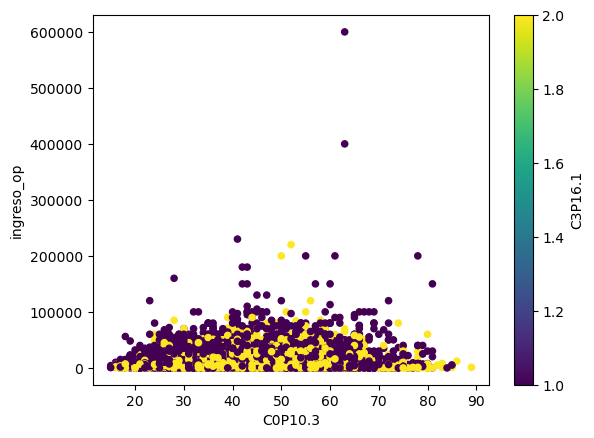

In [5]:
#esto esta errado porque no limpiamos los atipicos (99 o -99)
ax2 = df.plot.scatter(x='C0P10.3',

                      y='ingreso_op',

                      c='C3P16.1',

                      colormap='viridis')


In [6]:
#eliminamos los atipicos (99 o -99)
df = df[df.ingreso_op != -99]
df[["C3P16.1", "ingreso_op",'C0P10.3']].describe

<bound method NDFrame.describe of       C3P16.1  ingreso_op  C0P10.3
0           1        7000       75
2           2       32000       38
3           2       15000       37
5           2           0       74
6           1       48000       58
...       ...         ...      ...
8960        1       20000       64
8961        1       30000       29
8962        1       70000       51
8964        1       30000       46
8965        1       70000       47

[7845 rows x 3 columns]>

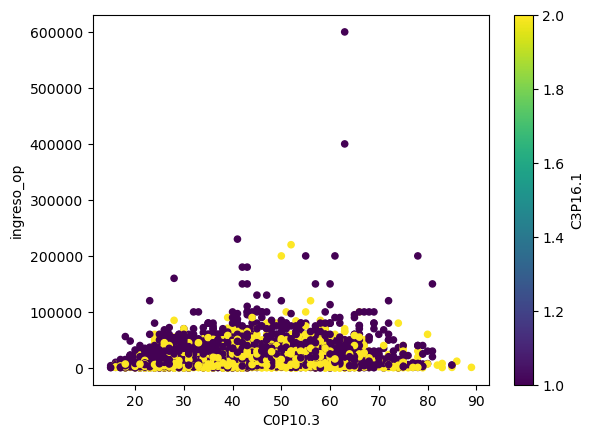

In [7]:
ax2 = df.plot.scatter(x='C0P10.3',

                      y='ingreso_op',

                      c='C3P16.1',

                      colormap='viridis')

In [8]:
#creamos dos dataframes uno para hombres y otro para mujeres

df1 = df[df['C3P16.1'] == 1]
df2 = df[df['C3P16.1'] == 2]

In [34]:
df.describe()

,hogar,region,ponderaocup,C0P10.2,C0P10.3,C3P16.1,C3P16.2,nivel_ed,C3P16.6,C3P16.6.1cod,...,C3P14.8,trabdom_noremu,C3P15.2,C3P15.3,C3P17.1,edadhogar,pershog_ag,edad_0a5,edad_6a11,edad_12a17
count,7845.000000,7845.000000,7845.000000,7845.000000,7845.000000,7845.000000,7845.000000,7845.000000,7845.000000,421.000000,...,1038.000000,7845.000000,7845.000000,7845.000000,7845.00000,7845.000000,7845.000000,7845.000000,7845.000000,7845.000000
mean,1.047801,33.599108,1880.709671,1.715105,41.047674,1.433142,2.000765,4.593499,1.178585,224.019002,...,7382.796724,1.289611,2.723008,3.587890,8.82269,3.579987,2.390312,1.261058,1.270491,1.262715
std,0.314342,14.071801,3532.926407,2.040771,13.146170,0.495541,3.537336,4.143904,3.502218,54.385700,...,8968.971972,3.333571,3.749912,3.681767,17.76446,1.841538,0.853560,0.439239,0.444242,0.440137
min,1.000000,10.000000,33.068129,1.000000,15.000000,1.000000,1.000000,0.000000,1.000000,202.000000,...,-99.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,10.000000,511.803091,1.000000,30.000000,1.000000,1.000000,3.000000,1.000000,205.000000,...,1500.000000,1.000000,1.000000,3.000000,3.00000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,41.000000,942.758868,1.000000,40.000000,1.000000,2.000000,4.000000,1.000000,221.000000,...,4800.000000,1.000000,3.000000,3.000000,5.00000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,43.000000,1988.286246,2.000000,50.000000,2.000000,2.000000,6.000000,1.000000,222.000000,...,10000.000000,1.000000,4.000000,5.000000,8.00000,6.000000,3.000000,2.000000,2.000000,2.000000
max,10.000000,44.000000,108675.467809,99.000000,89.000000,2.000000,99.000000,99.000000,99.000000,999.000000,...,86000.000000,99.000000,99.000000,99.000000,99.00000,7.000000,4.000000,2.000000,2.000000,2.000000


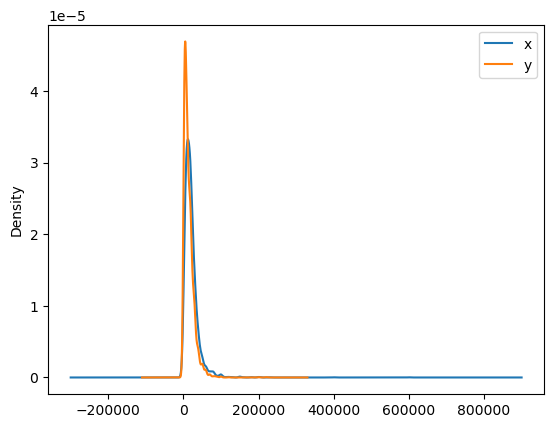

In [9]:
df4 = pd.DataFrame({
    'x': df1.ingreso_op,
    'y': df2.ingreso_op,
})

ax = df4.plot.kde()
#cuidado puede estar errado seguir limpiando atipicos y balancear

Interesante 
----------
correlacionar con ingresos VS jefes vs sexo vs Accidentes.


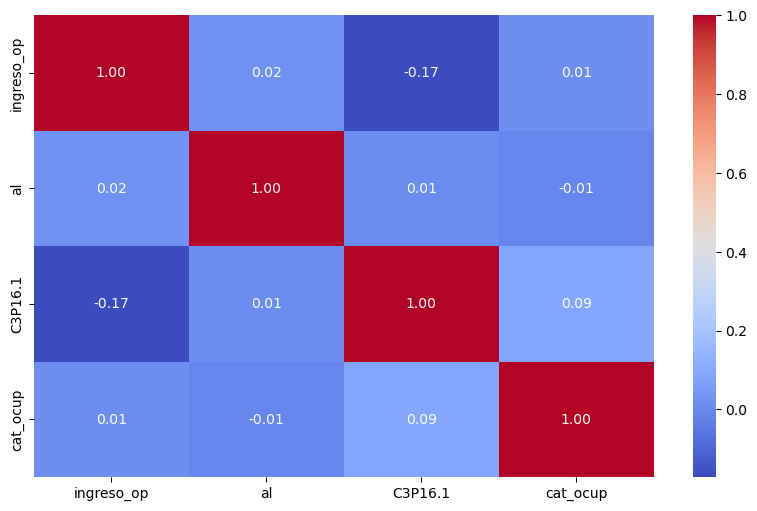

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,6))
sns.heatmap(df[['ingreso_op','al','C3P16.1','cat_ocup']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

El ingreso cae con el género?